# Midterm Q2
### Analysis 1 using ArticleRead
- Generate an API Key for article read.
- Dowloaded json files with "Red Sox" content
- Extracted the scores of Red Sox and the opponent teams details
- Analyzed how many matches Red Sox has won, lost or drew from all the total matches they have played and their trend through history
- Plot recent 25 matches of Red Sox vs Opponent team using Matplotlib

In [2]:
#getting Red Sox data from Article Read
from nytimesarticle import articleAPI
import requests
import json
import time
from pprint import pprint
for i in range(0, 100):
    j=str(i)
    r = requests.get("http://api.nytimes.com/svc/search/v2/articlesearch.json?page="+j+"&q=red sox&api-key="+NY_key_Article)  
    data = r.json()
    time.sleep(6)
    #saving the json files in local system
    with open("Midterm/ArticleSearch/red"+j+".json", 'w') as outfile:
        json.dump(data, outfile)

In [1]:
#Reading downloaded json files using glob function
import glob
import shutil
import os
import json
from pprint import pprint
files = []
json_files = glob.glob('Midterm/ArticleSearch/test/*.json') #absolute path to read the jason files
for file in json_files:
    with open(file) as data_file:
        data = json.load(data_file)
        files.append(data)
        
#pprint(data)

In [2]:
len(json_files)

122

In [5]:
pprint(data)

{'copyright': 'Copyright (c) 2013 The New York Times Company.  All Rights '
              'Reserved.',
 'response': {'docs': [{'_id': '4fd154f98eb7c8105d638aa9',
                        'abstract': None,
                        'blog': [],
                        'byline': None,
                        'document_type': 'article',
                        'headline': {'kicker': 'SPORTS PEOPLE',
                                     'main': 'Boyd Starts Practice'},
                        'keywords': [{'name': 'persons',
                                      'value': 'BOYD, DENNIS'},
                                     {'name': 'organizations',
                                      'value': 'BOSTON RED SOX'},
                                     {'name': 'subject',
                                      'value': 'SUSPENSIONS, DISMISSALS AND '
                                               'RESIGNATIONS'},
                                     {'name': 'subject', 'value': 'BASEBALL'},
      

In [6]:
#creating a csv to record scores of both the teams
import csv
with open("Red Sox.csv","w",encoding='utf-8') as myfile:
    writer = csv.writer(myfile, delimiter=",",) #, quotechar="|", quoting=csv.QUOTE_MINIMAL, lineterminator='\n'
    writer.writerow(["Team1","Team1","Score1","Team2","Score2"])

    RedSox_Scores = []
    total_goals_scored = []
    opponent_score = []
    for file in json_files:
        with open(file) as data_file:
            data = json.load(data_file)
            #x = len(data['response']['docs'])
            x = len(data)
            try:
                for i in range (0,x): #iterating over all the articles in the data file to get the score in content kicker
                    content=data['response']['docs'][i]['headline']['content_kicker']
                    content=content.split(",")
                    content.sort(key=lambda x: x.split('Red ')) #Sorting the data with Red Sox in first column
                    content = [x.strip(' ') for x in content] # removing the space from the name
                    content = [x.split(' ') for x in content] #splitting the team name with their respective score
                    #creating two separate list for scores of both the team
                    RedSox_Scores.append(int(content[0][2])) 
                    opponent_score.append(int(content[1][1]))
                    total_goals_scored = [x + y for x, y in zip(RedSox_Scores, opponent_score)]
                    pprint(content)
                    
                    #writing the scores of both the teams in the csv
                    writer.writerow([content[0][0],content[0][1],content[0][2],content[1][0],content[1][1]])
            except (KeyError, ValueError, IndexError) as e :
                pass
                

[['Red', 'Sox', '2'], ['Mets', '3']]
[['Red', 'Sox', '7'], ['Yankees', '8']]
[['Red', 'Sox', '4'], ['Yankees', '2']]
[['Red', 'Sox', '4'], ['Rays', '5']]
[['Red', 'Sox', '9'], ['Giants', '5']]
[['Red', 'Sox', '5'], ['Yankees', '9']]
[['Red', 'Sox', '4'], ['Mets', '2']]
[['Red', 'Sox', '10'], ['Yankees', '4']]
[['Red', 'Sox', '6'], ['Yankees', '8']]
[['Red', 'Sox', '2'], ['Yankees', '4']]
[['Red', 'Sox', '8'], ['Yankees', '4']]
[['Red', 'Sox', '4'], ['Rays', '13']]
[['Red', 'Sox', '2'], ['Yankees', '6']]
[['Red', 'Sox', '6'], ['Yankees', '8']]
[['Red', 'Sox', '7'], ['Yankees', '4']]
[['Red', 'Sox', '4'], ['Yankees', '3']]
[['Red', 'Sox', '1'], ['Yankees', '4']]
[['Red', 'Sox', '2'], ['Yankees', '1']]
[['Red', 'Sox', '5'], ['Yankees', '1']]
[['Red', 'Sox', '4'], ['Angels', '5']]
[['Red', 'Sox', '7'], ['Angels', '5']]
[['Red', 'Sox', '0'], ['Yankees', '1']]
[['Red', 'Sox', '6'], ['Yankees', '5']]
[['Red', 'Sox', '4'], ['Yankees', '3']]
[['Red', 'Sox', '3'], ['Yankees', '4']]
[['Red', 'Sox

In [7]:
#Getting the scores of top 105 matches
RedSox_Scores = RedSox_Scores[0:105]
opponent_score = opponent_score[0:105]
total_goals_scored = total_goals_scored[0:105]

In [8]:
#counting the statistics of matches won, lost and draw by RedSox
counter_win = 0
counter_draw = 0
counter_lost = 0

for x, y in zip(RedSox_Scores, opponent_score):
    if x > y:
        counter_win += 1
print ('Total matches won my Red Sox: ', counter_win) 

for x, y in zip(RedSox_Scores, opponent_score):
    if x < y:
        counter_lost += 1
print ('Total matches lost my Red Sox: ', counter_lost)
    
for x, y in zip(RedSox_Scores, opponent_score):    
    if x == y:
        counter_draw += 1
print ('Total matches draw: ', counter_draw)

Total matches won my Red Sox:  49
Total matches lost my Red Sox:  51
Total matches draw:  5


In [9]:
#getting the latest 25 matches data for plot
RedSox_plot = RedSox_Scores[80:105]
Opponent_plot = opponent_score[80:105]
total_goals_plot = total_goals_scored[80:105]

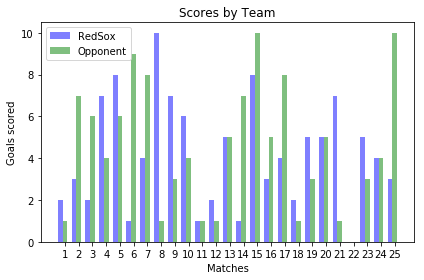

In [10]:
#plotting the scores of latest 25 matches 
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 25
RedSox1 = RedSox_plot
Opponent = Opponent_plot
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5
 
rects1 = plt.bar(index, RedSox1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='RedSox')
 
rects2 = plt.bar(index + bar_width, Opponent, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Opponent')
 
plt.xlabel('Matches')
plt.ylabel('Goals scored')
plt.title('Scores by Team')
plt.xticks(index + bar_width, range(1,26))
plt.legend()
 
plt.tight_layout()
plt.show()

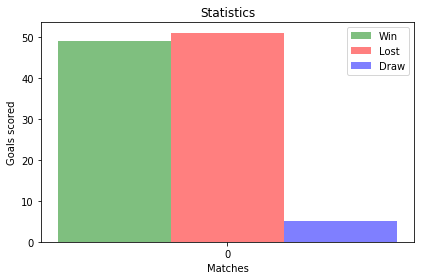

In [17]:
#plotting the scores of latest 25 matches 
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
#n_groups = 1
win = counter_win
lost = counter_lost
draw = counter_draw
 
# create plot
fig, ax = plt.subplots()
#index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5
 
rects1 = plt.bar(index, win, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Win')
 
rects2 = plt.bar(index + bar_width, lost, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Lost')

rects3 = plt.bar(index + bar_width + bar_width, draw, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Draw')

 
plt.xlabel('Matches')
plt.ylabel('Goals scored')
plt.title('Statistics')
plt.xticks(index + bar_width, range(0,1))
plt.legend()
 
plt.tight_layout()
plt.show()

In [11]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#print (__version__) 

In [12]:
#create line chart
import plotly.plotly as py
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = RedSox_plot,
    y = total_goals_plot,
    mode = 'markers',
    name = 'Red Sox'
)

data = [trace]

plot(data, filename='Red Sox Plot')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/plotly/offline/offline.py:440: UserWarning:

Your filename `Red Sox Plot` didn't end with .html. Adding .html to the end of your file.



'file:///usr/local/share/Red Sox Plot.html'

In [13]:
#create line chart
import plotly.plotly as py
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = RedSox_plot,
    y = total_goals_plot,
    mode = 'markers',
    name = 'Red Sox'
)

trace1 = go.Scatter(
    x = Opponent_plot,
    y = total_goals_plot,
    mode = 'markers',
    name = 'Opponent'
)


data = [trace,trace1]

plot(data, filename='Red Sox vs opponents Plot')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/plotly/offline/offline.py:440: UserWarning:

Your filename `Red Sox vs opponents Plot` didn't end with .html. Adding .html to the end of your file.



'file:///usr/local/share/Red Sox vs opponents Plot.html'

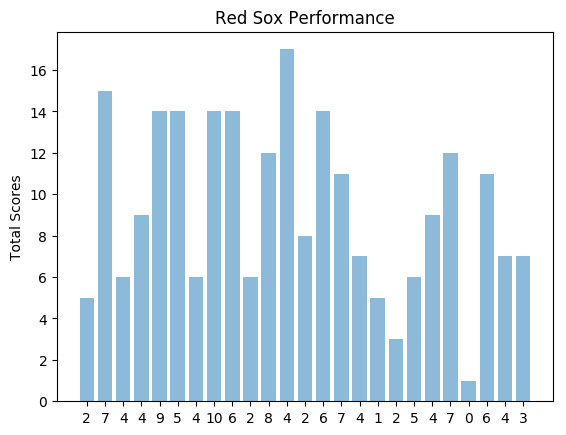

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = RedSox_Scores
y_pos = np.arange(len(objects))
performance = total_goals_scored
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total Scores')
plt.title('Red Sox Performance')
 
plt.show()